11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Train data shape: (60000, 784)
Test data shape: (10000, 784)
Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.3825 - val_loss: 0.1917
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1809 - val_loss: 0.1537
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1495 - val_loss: 0.1339
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1320 - val_loss: 0.1213
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1204 - val_loss: 0.1130
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1127 - val_loss: 0.1070
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1073 - val_loss: 0.1026
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1031 - val_loss: 0.0994
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1002 - val_loss: 0.0973
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0984 - val_loss: 0.0956
Epoch 11/50
235/235 ━━━━━━━

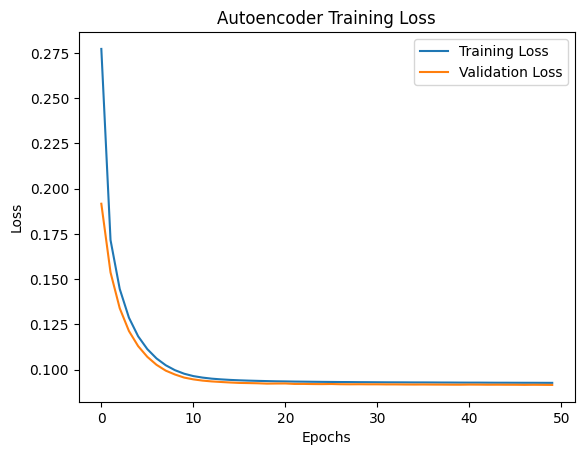

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


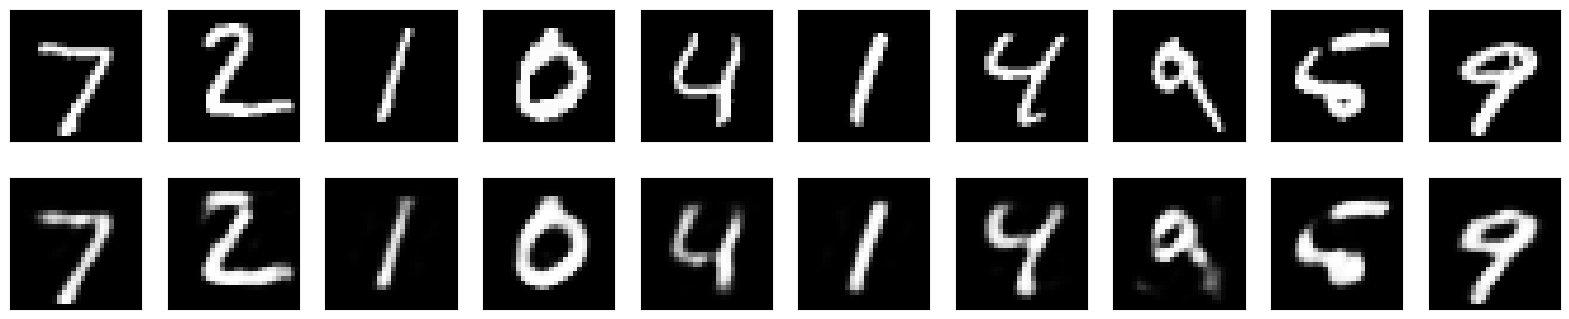

In [1]:
# -------------------------------
# DL Experiment 4 - Autoencoder for Anomaly Detection
# -------------------------------

# Import libraries
import keras
from keras import layers
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# Step 1: Define Autoencoder Architecture
# -------------------------------

# Size of encoded representation (compression factor)
encoding_dim = 32  # Compress 784 → 32

# Input layer (28x28 = 784 flattened pixels)
input_img = keras.Input(shape=(784,))

# Encoder: compress input to 32-dim vector
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)

# Decoder: reconstruct input from encoded representation
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# Full autoencoder model (input → reconstructed output)
autoencoder = keras.Model(input_img, decoded)

# -------------------------------
# Step 2: Create Encoder and Decoder models separately
# -------------------------------

# Encoder model (input → encoded vector)
encoder = keras.Model(input_img, encoded)

# Decoder model (encoded vector → reconstructed image)
encoded_input = keras.Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]  # Last layer from autoencoder
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

# -------------------------------
# Step 3: Compile Autoencoder
# -------------------------------
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# -------------------------------
# Step 4: Load and prepare MNIST dataset
# -------------------------------
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize images to range [0, 1]
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flatten 28x28 images → 784 vector
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print("Train data shape:", x_train.shape)
print("Test data shape:", x_test.shape)

# -------------------------------
# Step 5: Train Autoencoder
# -------------------------------
history = autoencoder.fit(
    x_train, x_train,          # Input = Output (self-supervised)
    epochs=50,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test)
)

# -------------------------------
# Step 6: Visualize Training Loss
# -------------------------------
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Autoencoder Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# -------------------------------
# Step 7: Encode and Decode (Reconstruct Images)
# -------------------------------
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

# -------------------------------
# Step 8: Display Original vs Reconstructed Images
# -------------------------------
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images (top row)
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed images (bottom row)
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
